# AO3 Top 100 Works by Kudos - Exploratory Data Analysis

Note: This data was collected personally from Archive of Our Own in November 3, 2022 using a webscraper and has been cleaned for ease of analysis. It is possible for the top 100 works on the website to differ today from what it was then.

In [253]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import sklearn


While the initial csv, top_100_kudos_clean contains all the necessary data for this project, the boolean dataframes were created to make it easier to analyze the data in many of the columns, which is in the format of a list. Work_id is the primary key connecting these dataframes.

In [254]:
# Import Data
top_100_kudos = pd.read_csv('top_100_kudos_clean.csv')
characters_bool = pd.read_csv('top_100_kudos_characters_bool.csv')
fandoms_bool = pd.read_csv('top_100_kudos_fandoms_bool.csv')
freeforms_bool = pd.read_csv('top_100_kudos_freeforms_bool.csv')
relationships_bool = pd.read_csv('top_100_kudos_relationships_bool.csv')
slash_categories_bool = pd.read_csv('top_100_kudos_slash_categories_bool.csv')
warnings_bool = pd.read_csv('top_100_kudos_warnings_bool.csv')

### Initial Exploration
The following code helps to familiarize oneself with the data. 

In [255]:
# Viewing the Index and Columns of the main dataframe
print(top_100_kudos.index)
print(top_100_kudos.columns)


RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'work_id', 'user_id', 'title', 'username', 'fandoms',
       'rating', 'warnings', 'slash_categories', 'status', 'date_updated',
       'relationships', 'characters', 'freeforms', 'summary', 'language',
       'words', 'chapters', 'comments', 'kudos', 'bookmarks', 'hits',
       'completed', 'chapters_written', 'chapters_total'],
      dtype='object')


In [256]:
# Viewing the Index and Columns of the boolean tables
print('characters_bool')
print(characters_bool.index)
print(characters_bool.columns)

print('fandoms_bool')
print(fandoms_bool.index)
print(fandoms_bool.columns)

print('freeforms_bool')
print(freeforms_bool.index)
print(freeforms_bool.columns)

print('relationships_bool')
print(relationships_bool.index)
print(relationships_bool.columns)

print('slash_categories_bool')
print(slash_categories_bool.index)
print(slash_categories_bool.columns)

print('warnings_bool')
print(warnings_bool.index)
print(warnings_bool.columns)


characters_bool
RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'Groot (Marvel)', 'Remus Lupin', 'Sirius Black',
       'James Potter', 'Lily Evans Potter', 'Peter Pettigrew', 'Severus Snape',
       'Minerva McGonagall', 'Bellatrix Black Lestrange',
       ...
       'Iwaizumi Hajime', 'Oikawa Tooru', 'Sawamura Daichi', 'Sugawara Koushi',
       'Kindaichi Yuutarou', 'Azumane Asahi', 'Nishinoya Yuu', 'Kunimi Akira',
       'Irihata Nobuteru', 'Baron Zemo'],
      dtype='object', length=395)
fandoms_bool
RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'Guardians of the Galaxy - All Media Types', 'Marvel',
       'Marvel (Movies)', 'Marvel (Comics)',
       'Guardians of the Galaxy (Comics)', 'Harry Potter - J. K. Rowling',
       'Dream SMP', '僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia',
       'Haikyuu!!', 'Star Wars - All Media Types',
       'Star Wars Episode VII: The Force Awakens (2015)',
       'Minecraft (Video Game)', 'Video Blogging RPF', 'Te

It seems that the work_id is not the index. To fix that, I will reset the index of all the dataframes. This will keep a consistent primary key across all the dataframes, easing the work.

In [257]:
# Making sure the 'Unnamed: 0' column in the boolean dataframes is indeed the work_id
# print(characters_bool['Unnamed: 0'].head())
# print(fandoms_bool['Unnamed: 0'].head())
# print(freeforms_bool['Unnamed: 0'].head())
# print(relationships_bool['Unnamed: 0'].head())
# print(slash_categories_bool['Unnamed: 0'].head())
# print(warnings_bool['Unnamed: 0'].head())

# Reseting the indices.
top_100_kudos.set_index('work_id', inplace=True)
characters_bool.set_index('Unnamed: 0', inplace=True)
fandoms_bool.set_index('Unnamed: 0', inplace=True)
freeforms_bool.set_index('Unnamed: 0', inplace=True)
relationships_bool.set_index('Unnamed: 0', inplace=True)
slash_categories_bool.set_index('Unnamed: 0', inplace=True)
warnings_bool.set_index('Unnamed: 0', inplace=True)


Let's take a look at some of the statistics associated with the data!

In [258]:
# The old index column doubles as a rank on the basis of kudos so it gets renamed
top_100_kudos = top_100_kudos.rename(columns={'Unnamed: 0': 'rank'})

# The numerical data
print(top_100_kudos.describe())

             rank          words      comments          kudos     bookmarks  \
count  100.000000     100.000000    100.000000     100.000000    100.000000   
mean    49.500000  109820.640000   5029.820000   37008.180000   8147.160000   
std     29.011492  117619.939227   5649.419417   16226.197257   3460.596062   
min      0.000000      12.000000    232.000000   27173.000000   2082.000000   
25%     24.750000   12778.500000    937.500000   28841.750000   5640.500000   
50%     49.500000   74024.000000   3156.000000   31329.500000   8035.500000   
75%     74.250000  176300.750000   7059.000000   38771.000000   9679.250000   
max     99.000000  526969.000000  26966.000000  127483.000000  24991.000000   

               hits  chapters_written  chapters_total  
count  1.000000e+02        100.000000       90.000000  
mean   8.475519e+05         20.580000       19.555556  
std    9.350462e+05         28.956666       30.169972  
min    1.810710e+05          1.000000        1.000000  
25%    3

In [259]:
# The most popular tags in the categorical data
print(characters_bool.sum().sort_values(ascending=False).head(10))
print(fandoms_bool.sum().sort_values(ascending=False).head(10))
print(freeforms_bool.sum().sort_values(ascending=False).head(10))
print(relationships_bool.sum().sort_values(ascending=False).head(10))
print(slash_categories_bool.sum().sort_values(ascending=False).head(10))
print(warnings_bool.sum().sort_values(ascending=False).head(10))

Draco Malfoy                  22
Harry Potter                  20
Hermione Granger              17
Ron Weasley                   14
Midoriya Izuku                13
Derek Hale                    12
Stiles Stilinski              12
Todoroki Shouto               12
Bakugou Katsuki               11
Aizawa Shouta | Eraserhead    10
dtype: int64
Harry Potter - J. K. Rowling                              28
僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia    15
Teen Wolf (TV)                                            12
방탄소년단 | Bangtan Boys | BTS                                 6
Dream SMP                                                  6
Marvel Cinematic Universe                                  5
Captain America (Movies)                                   4
Spider-Man - All Media Types                               4
Minecraft (Video Game)                                     4
Haikyuu!!                                                  3
dtype: int64
Hurt/Comfort                      

There is large diversity to the data. If I wanted to look more specifically into a fandom or character, there would be few data points. For more specific research I would need to rescrape data from the website, filtered by that fandom, character, etc.. 

As the data is now, it is better suited for broader analysis. In the future, I may wish to scrape the top 1000 fanfics.

### Visualizing Spread, Trends, and Patterns - Numerical Data

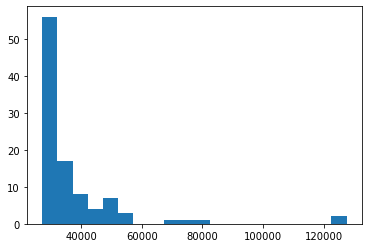

<Figure size 432x288 with 0 Axes>

In [260]:
# Let's take a look at the spread of the kudos
plt.hist(top_100_kudos['kudos'], bins=20)
plt.show()
plt.clf()

It appears that only a few fanfics have cracked the 100,000 kudos mark. A few more are over 60k, but the vast majority are under this mark, and the lower the number of kudos, the higher the count of fanfictions. I would expect this data to be increasingly right skewed the more data I collected, given that the intitial data was sorted by kudos, descending.

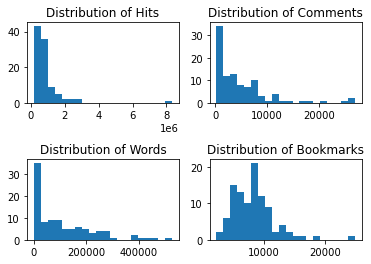

<Figure size 432x288 with 0 Axes>

In [261]:
# Let's see if the data continues its trend for hits, comments, words, and bookmarks.
plt.subplot(2, 2, 1)
plt.hist(top_100_kudos['hits'], bins=20)
plt.title('Distribution of Hits')

plt.subplot(2, 2, 2)
plt.hist(top_100_kudos['comments'], bins=20)
plt.title('Distribution of Comments')

plt.subplot(2, 2, 3)
plt.hist(top_100_kudos['words'], bins=20)
plt.title('Distribution of Words')

plt.subplot(2, 2, 4)
plt.hist(top_100_kudos['bookmarks'], bins=20)
plt.title('Distribution of Bookmarks')

plt.subplots_adjust(hspace=0.7)
plt.show()
plt.clf()

All of the data is right-skewed. It seems like there is one work that has an extremely high number of hits. It'll be curious to see if the same works have the highest counts for each type of data, or if there is some other pattern to the data and the outliers.

In [262]:
# Getting the title of the outlier by hits.
print(top_100_kudos[top_100_kudos['hits']>4000000].title)

# And the outlier by bookmarks
print(top_100_kudos[top_100_kudos['bookmarks']>20000].title)

work_id
work_10057010    All the Young Dudes
Name: title, dtype: object
work_id
work_10057010    All the Young Dudes
Name: title, dtype: object


It's the same fic! Let's see if there is a correlation between number of hits and number of bookmarks. A scatterplot is a great tool for this.

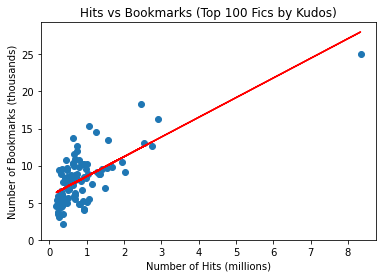

The R^2 value is: 0.513529413915355
While there is some indication of correlation between hits and bookmarks, it is not particularly strong.


<Figure size 432x288 with 0 Axes>

In [263]:
# Creating a line of best fit for the number of bookmarks, based on the number of hits.
model = sm.OLS.from_formula('bookmarks ~ hits', data=top_100_kudos)
results = model.fit()
fitted_values_bm_hts = results.predict(top_100_kudos.hits)

# Creating a scatterplot
ax = plt.subplot(1, 1, 1)
plt.scatter(top_100_kudos['hits'], top_100_kudos['bookmarks'])
plt.plot(top_100_kudos.hits, fitted_values_bm_hts, color='r')
ax.set_xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000])
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax.set_yticklabels([0, 5, 10, 15, 20, 25])
plt.xlabel('Number of Hits (millions)')
plt.ylabel('Number of Bookmarks (thousands)')
plt.title('Hits vs Bookmarks (Top 100 Fics by Kudos)')

plt.show()
plt.clf()

#Calculating the r-squared value to determine the strength of correlation.
corr_matrix = np.corrcoef(top_100_kudos['bookmarks'], fitted_values_bm_hts)
corr = corr_matrix[0,1]
R_sq_bm_hts = corr**2
print('The R^2 value is:', R_sq_bm_hts)
print('While there is some indication of correlation between hits and bookmarks, it is not particularly strong.')

Let's investigate the correlation between some of the other variables. Bookmarks are typically used to return to a fic and read it later. I would expect a correlation between bookmarks and either the length of the fic (words) or the number of chapters.

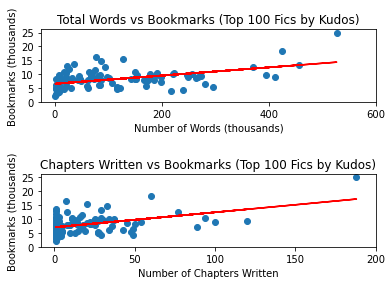

With an r-squared value of 0.25 there is a very weak correlation between the length of a fic and the number of bookmarks it has.
With an r-squared value of 0.21 there is a very weak correlation between the number of chapters written and the number of bookmarks it has.


<Figure size 432x288 with 0 Axes>

In [264]:
# Creating a line of best fit for the number of bookmarks, based on the number of words.
model = sm.OLS.from_formula('bookmarks ~ words', data=top_100_kudos)
results = model.fit()
fitted_values_bm_wds = results.predict(top_100_kudos['words'])

# Creating a line of best fit for the number of bookmarks, based on the number of chapters already written.
model = sm.OLS.from_formula('bookmarks ~ chapters_written', data=top_100_kudos)
results = model.fit()
fitted_values_bm_chpwr = results.predict(top_100_kudos['chapters_written'])

# Using a scatterplot to visualize the correlations
#Total Words vs Bookmarks
ax = plt.subplot(2, 1, 1)
plt.scatter(top_100_kudos['words'], top_100_kudos['bookmarks'])
plt.plot(top_100_kudos['words'], fitted_values_bm_wds, color='r')
ax.set_xticks([0, 200000, 400000, 600000])
ax.set_xticklabels([0, 200, 400, 600])
ax.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax.set_yticklabels([0, 5, 10, 15, 20, 25])
plt.xlabel('Number of Words (thousands)')
plt.ylabel('Bookmarks (thousands)')
plt.title('Total Words vs Bookmarks (Top 100 Fics by Kudos)')

# Chapters Written vs Bookmarks 
ax = plt.subplot(2, 1, 2)
plt.scatter(top_100_kudos['chapters_written'], top_100_kudos['bookmarks'])
plt.plot(top_100_kudos['chapters_written'], fitted_values_bm_chpwr, color='r')
ax.set_xticks([0, 50, 100, 150, 200])
ax.set_xticklabels([0, 50, 100, 150, 200])
ax.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax.set_yticklabels([0, 5, 10, 15, 20, 25])
plt.xlabel('Number of Chapters Written')
plt.ylabel('Bookmarks (thousands)')
plt.title('Chapters Written vs Bookmarks (Top 100 Fics by Kudos)')

plt.subplots_adjust(hspace=1)
plt.show()
plt.clf()

#Calculating the r-squared value to determine the strength of correlation.
#Total Words vs Bookmarks
corr_matrix = np.corrcoef(top_100_kudos['bookmarks'], fitted_values_bm_wds)
corr = corr_matrix[0,1]
R_sq_bm_wds = corr**2

# Chapters Written vs Bookmarks 
corr_matrix = np.corrcoef(top_100_kudos['bookmarks'], fitted_values_bm_chpwr)
corr = corr_matrix[0,1]
R_sq_bm_chpwr = corr**2

print('With an r-squared value of', round(R_sq_bm_wds, 2), 'there is a very weak correlation between the length of a fic and the number of bookmarks it has.')
print('With an r-squared value of', round(R_sq_bm_chpwr, 2), 'there is a very weak correlation between the number of chapters written and the number of bookmarks it has.')

The lack of a correlation is suprising to me, and I wonder if I've conflate the bookmarks with the use of the "Mark for later" button, which adds an unfinished work to a private list and notifies the reader of updates. The bookmark may instead be used by readers to highlight works that they particularly enjoyed. Perhaps, then, the correlation between kudos and bookmarks will be more significant.

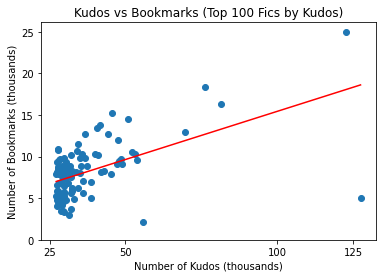

With an r-squared value of 0.29 there is a very weak correlation between the number of kudos on a work and the number of bookmarks it has.


<Figure size 432x288 with 0 Axes>

In [265]:
# Creating a line of best fit for the number of bookmarks, based on the number of kudos.
model = sm.OLS.from_formula('bookmarks ~ kudos', data=top_100_kudos)
results = model.fit()
fitted_values_bm_kds = results.predict(top_100_kudos.kudos)

# Creating a scatterplot of bookmarks vs kudos
ax = plt.subplot(1, 1, 1)
plt.scatter(top_100_kudos['kudos'], top_100_kudos['bookmarks'])
plt.plot(top_100_kudos.kudos, fitted_values_bm_kds, color='r')
ax.set_xticks([25000, 50000, 100000, 125000])
ax.set_xticklabels([25, 50, 100, 125])
ax.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax.set_yticklabels([0, 5, 10, 15, 20, 25])
plt.xlabel('Number of Kudos (thousands)')
plt.ylabel('Number of Bookmarks (thousands)')
plt.title('Kudos vs Bookmarks (Top 100 Fics by Kudos)')

plt.show()
plt.clf()

#Calculating the r-squared value to determine the strength of correlation.
corr_matrix = np.corrcoef(top_100_kudos['bookmarks'], fitted_values_bm_kds)
corr = corr_matrix[0,1]
R_sq_bm_kds = corr**2

print('With an r-squared value of', round(R_sq_bm_kds, 2), 'there is a very weak correlation between the number of kudos on a work and the number of bookmarks it has.')


### Visualizing Trends, and Patterns - Categorical Data
Let's take a dive into the categorical data and see what interesting trends are revealed. Does slash category affect the average rating of kudos or bookmarks? What are the most popular fandoms in these top 100 fanfics?

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20693 (\N{CJK UNIFIED IDEOGRAPH-50D5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/o

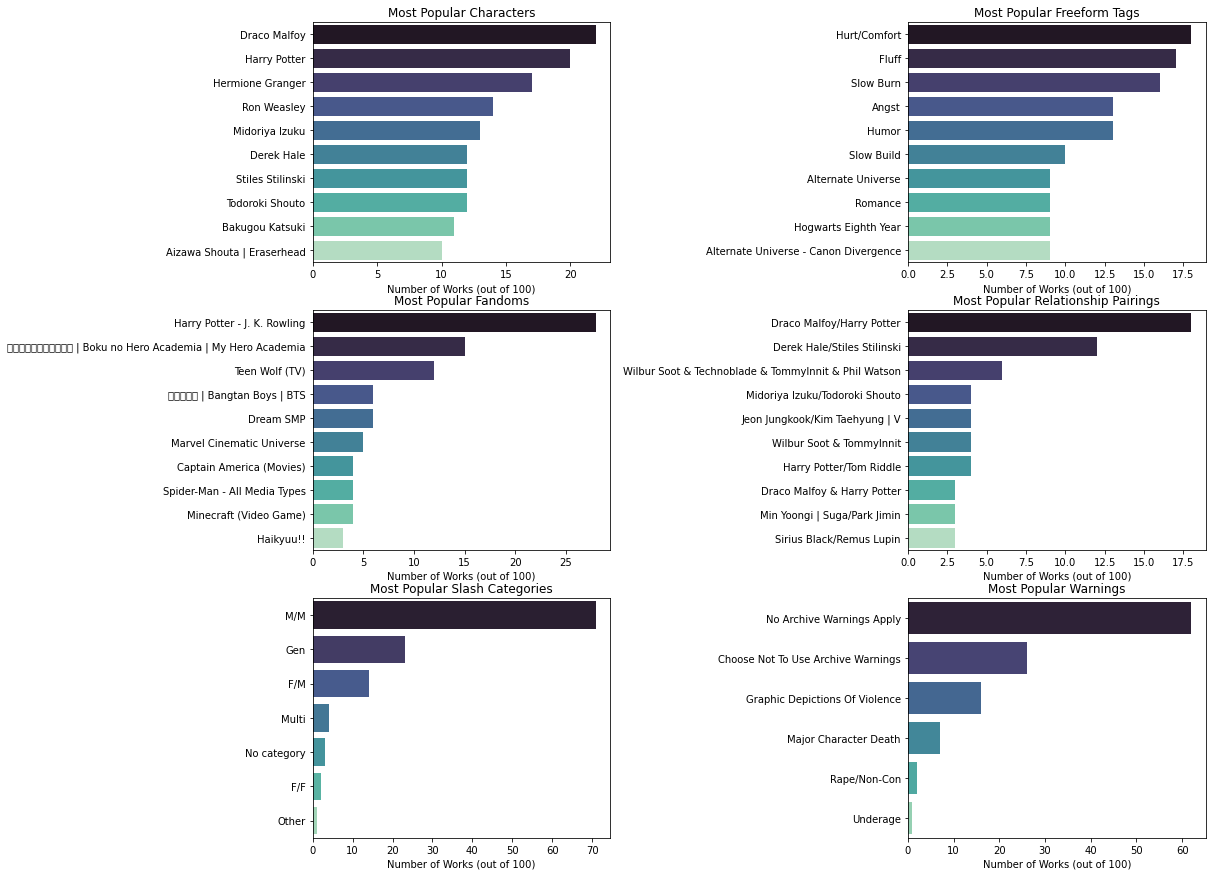

<Figure size 432x288 with 0 Axes>

In [287]:
# Visualizing the count of the most popular tags (labels applied to a fic) in each category (relationships, characters, fandoms, etc..)

# Saving the most popular tags in each category to a series
top_10_characters = characters_bool.sum().sort_values(ascending=False).head(10)
top_10_fandoms = fandoms_bool.sum().sort_values(ascending=False).head(10)
top_10_freeforms = freeforms_bool.sum().sort_values(ascending=False).head(10)
top_10_relationships = relationships_bool.sum().sort_values(ascending=False).head(10)
top_slash_categories = slash_categories_bool.sum().sort_values(ascending=False)
top_warnings = warnings_bool.sum().sort_values(ascending=False)

# First we need the x values, the x labels, and the height of the bars for each of the categories, then we can plot them onto a barplot. 

plt.figure(figsize=(16, 15))


# Get a list of just the characters
y_labels = top_10_characters.keys()
# Create a list of necessary length
y_values = [*range(len(y_labels))]
# Grab just the count of each occurence of a tag
x_values = top_10_characters.tolist()
title = 'Most Popular Characters'

#Create a subplot for characters
ax = plt.subplot(3, 2, 1)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)


# Get a list of just the freeforms
y_labels = top_10_freeforms.keys()
# Create a list of necessary length
y_values = [*range(len(y_labels))]
# Grab just the count of each occurence of a tag
x_values = top_10_freeforms.tolist()
title = 'Most Popular Freeform Tags'

#Create a subplot for freeform tags
ax = plt.subplot(3, 2, 2)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)

# Fandoms
y_labels = top_10_fandoms.keys() # 
y_values = [*range(len(y_labels))]
x_values = top_10_fandoms.tolist()
title = 'Most Popular Fandoms'

#Create a subplot for freeform tags
ax = plt.subplot(3, 2, 3)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)

# Relationships
y_labels = top_10_relationships.keys() # 
y_values = [*range(len(y_labels))]
x_values = top_10_relationships.tolist()
title = 'Most Popular Relationship Pairings'

#Create a subplot for relationship tags
ax = plt.subplot(3, 2, 4)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)

# Slash Categories
y_labels = top_slash_categories.keys() # 
y_values = [*range(len(y_labels))]
x_values = top_slash_categories.tolist()
title = 'Most Popular Slash Categories'

#Create a subplot for slash tags
ax = plt.subplot(3, 2, 5)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)

# Warnings
y_labels = top_warnings.keys() # 
y_values = [*range(len(y_labels))]
x_values = top_warnings.tolist()
title = 'Most Popular Warnings'

#Create a subplot for slash tags
ax = plt.subplot(3, 2, 6)
sns.barplot(x=x_values, y=y_values, orient='h', palette='mako')
ax.set_yticks(y_values)
ax.set_yticklabels(y_labels)
plt.xlabel('Number of Works (out of 100)')
plt.title(title)

plt.subplots_adjust(wspace=1)
plt.show()
plt.clf()